In [9]:
from config import DB_PATH
from tesis import apply_mpl_style
apply_mpl_style()

In [10]:
# ─────────────────────────────  PREPARACIÓN  ──────────────────────────────
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from tesis.graficos_utils import (
    add_hitos, add_cycle_means_multi,
    add_year_value_annotations, add_period_growth_annotations_multi
)

In [11]:
# 0. Ciclos y carpetas
periods = {
    "Expansión 51-70": slice(1951, 1970),
    "Recesión 71-84":  slice(1971, 1984),
    "Expansión 85-05": slice(1985, 2005),
    "Expansión 06-14": slice(2006, 2014),
    "Recesión 15-20":  slice(2015, 2020),
}
output_dir = "../../../../assets/tesis/serie_completa/finanzas"
os.makedirs(output_dir, exist_ok=True)

In [12]:
# 1. Datos ────────────────────────────────────────────────────────────────
with sqlite3.connect(DB_PATH, uri=True) as conn:
    df = (
        pd.read_sql("SELECT * FROM deuda_externa_total", conn)
        .set_index("año")
        .sort_index()
    )

In [15]:
# variables y colores
cols = ["deuda"]
abbr = {"deuda": "D"}
colors = {"deuda": "#1f77b4"}

cycle_stats = {name: df.loc[slc, cols].mean().to_dict() for name, slc in periods.items()}

hitos_v = {1951: "", 1971: "", 1985: "", 2006: "", 2015: ""}
hitos_offset = {yr: 0.9 for yr in hitos_v}

anot_years = [1951, 1971, 1985, 2006, 2015, 2020]
annotation_offsets = {"deuda": {yr: (0, 0) for yr in anot_years}}

growth_periods = [(1951,1971),(1971,1985),(1985,2006),(2006,2015),(2015,2020)]
period_growth_offsets = {
    "1951-1971": (1956,0.80),
    "1971-1985": (1976,0.80),
    "1985-2006": (1990,0.80),
    "2006-2015": (2005,0.80),
    "2015-2020": (2015,0.42),
}
cycle_text_offsets = {
    "Expansión 51-70": (1956,0.92),
    "Recesión 71-84":  (1976,0.92),
    "Expansión 85-05": (1990,0.92),
    "Expansión 06-14": (2005,0.92),
    "Recesión 15-20":  (2015,0.62),
}

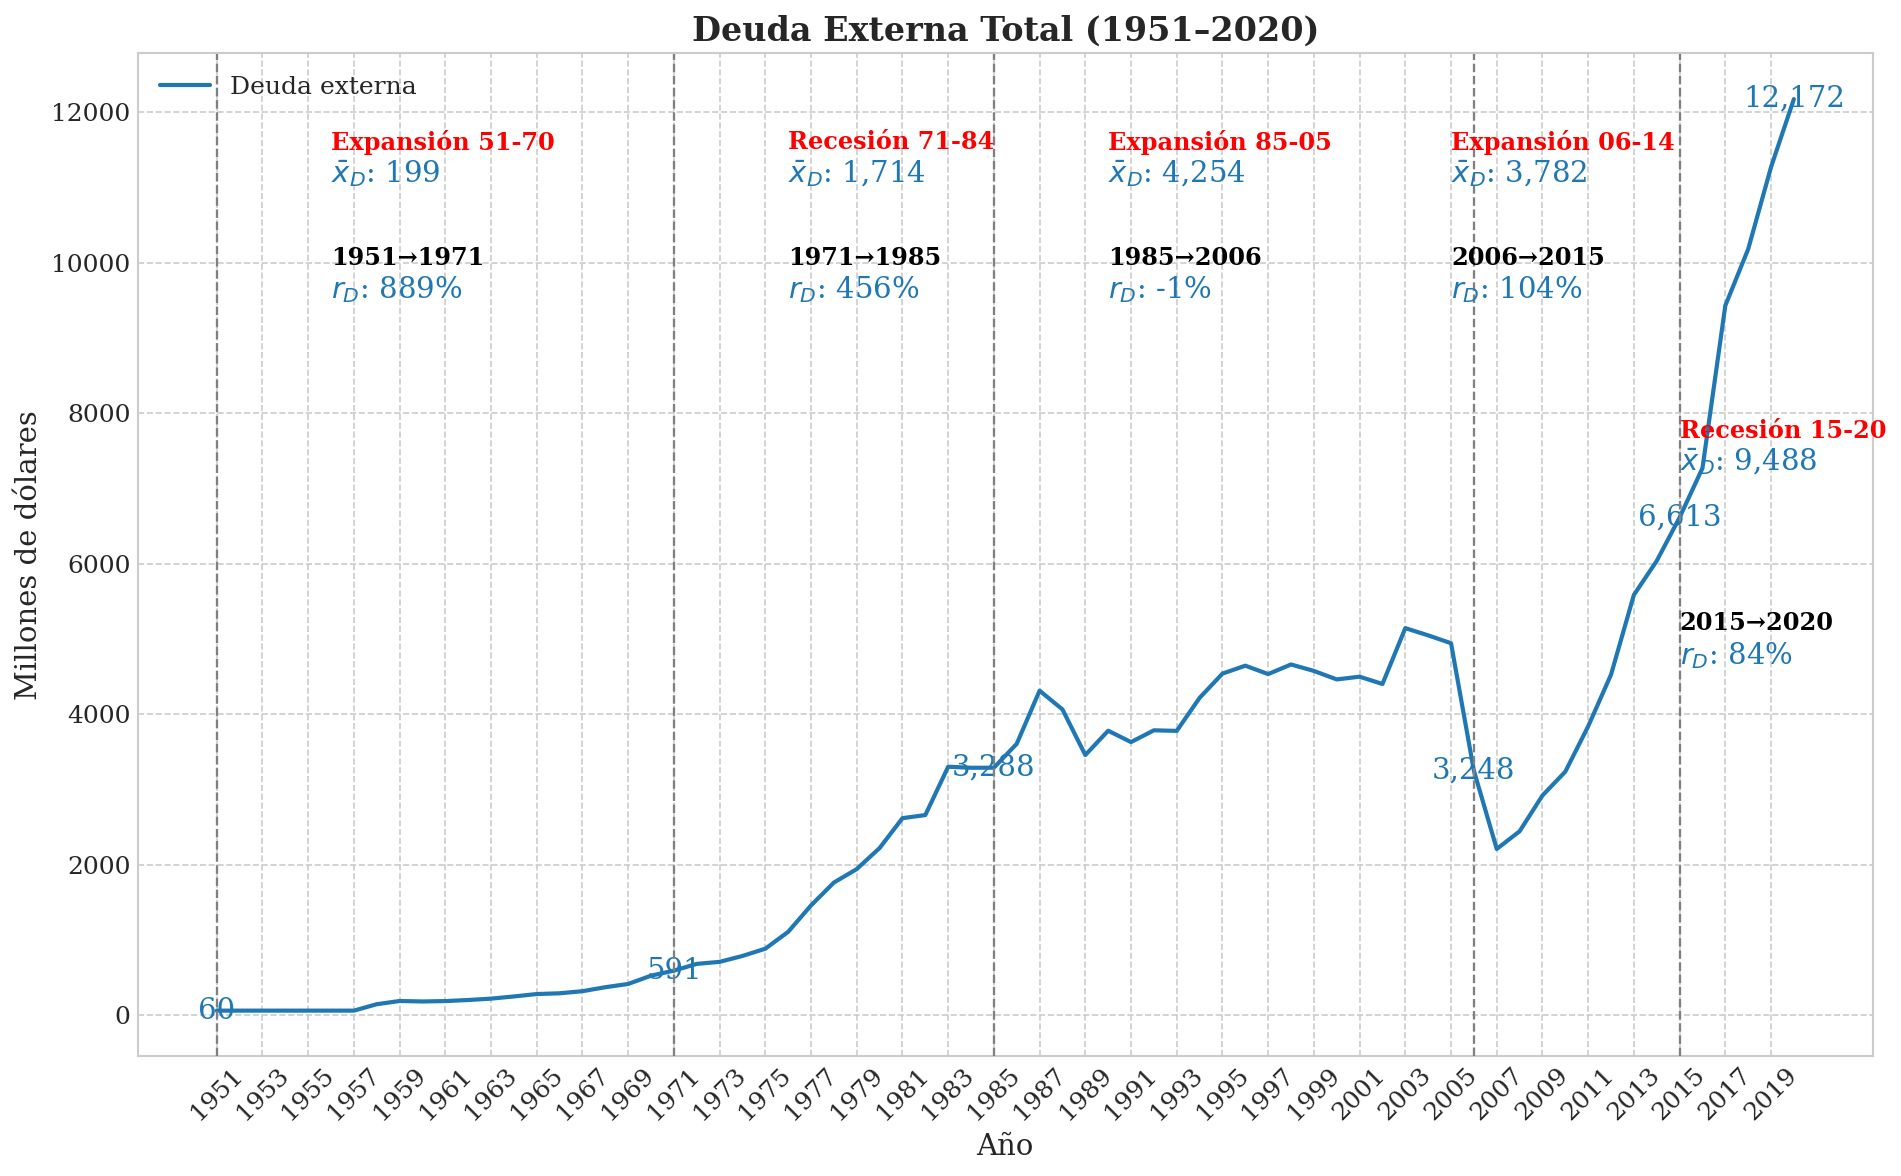

In [16]:
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df.index, df["deuda"], label="Deuda externa", color=colors["deuda"])

add_hitos(ax, df.index, hitos_v, hitos_offset)
add_cycle_means_multi(
    ax, cycle_stats, cycle_text_offsets,
    abbr, colors, line_spacing=df["deuda"].max()*0.03
)
add_year_value_annotations(
    ax, df, anot_years, cols,
    annotation_offsets, colors, arrow_lw=0.6
)
add_period_growth_annotations_multi(
    ax, df, growth_periods, cols,
    period_growth_offsets, colors, abbr
)

ax.set_title(f"Deuda Externa Total ({df.index[0]}–{df.index[-1]})", fontweight="bold")
ax.set_xlabel("Año")
ax.set_ylabel("Millones de dólares")
ax.set_xticks(df.index[::max(1, len(df)//31)])
ax.tick_params(axis="x", rotation=45)
ax.legend(loc="upper left")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "deuda_externa_total.png"), dpi=300)
plt.show()